# World Happiness Report Project


## Intro
In todays world, we're seeing a rise in mental health issues, particularly among younger generations like Gen Z. This growing concern has lead to the question this project intends to answer: **What can countries do to improve the well-being of their citizens?**

## Data Processing

In [22]:
#Install libraries
!pip install seaborn
!pip install scikit-learn
!pip install statsmodel


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np  #Numerical operations
from sklearn.model_selection import train_test_split  #Splitting data into train/test sets
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.metrics import root_mean_squared_error #Linear Regression model evaluation
from sklearn.ensemble import RandomForestClassifier  #Machine learning model (Random Forest)
from sklearn.metrics import accuracy_score, classification_report  #Model evaluation for decsion tree and random forest 
from sklearn.tree import DecisionTreeClassifier, plot_tree #Decison tree (ML Model)
import matplotlib.pyplot as plt #Basic visulizations  
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.feature_selection import RFE #Wrapper Method (RFE) feature selection 
import seaborn as sns #Using for advanced visulalizations such as Correlation Heatmap
import statsmodels.api as sm #Provides summary for model
from sklearn.feature_selection import SelectKBest, f_regression  #Filter method feature selection 
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score #Model evaluation for logistic regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Confusion matrix 


In [2]:
#Read in CSV file 
df = pd.read_csv('2019.csv', index_col=0)

In [15]:
#Display first 5 rows 
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


The Score column, derived from the Gallup World Poll, represents each country's happiness score and serves as the target variable for this analysis. The Score is calculated using factors such as GDP, life expectancy, social support, freedom, perceptions of corruption, and generosity.

Countries are ranked in descending order based on their happiness scores, with higher scores indicating greater overall happiness.

In [4]:
#Display last 5 rows
df.tail()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [17]:
df.shape

(156, 8)

In [18]:
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [16]:
#Get info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


Seems like there's no missing values in our dataset however just to be sure...

In [19]:
df.isnull().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Yep no missing values, so there's no need for imputation or dropping rows

In [20]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Now that we have some of the basic information about our dataframe lets move on and explore some of the factors that contribute to a country being happy

## EDA

#### Correlation Heatmap

<Axes: >

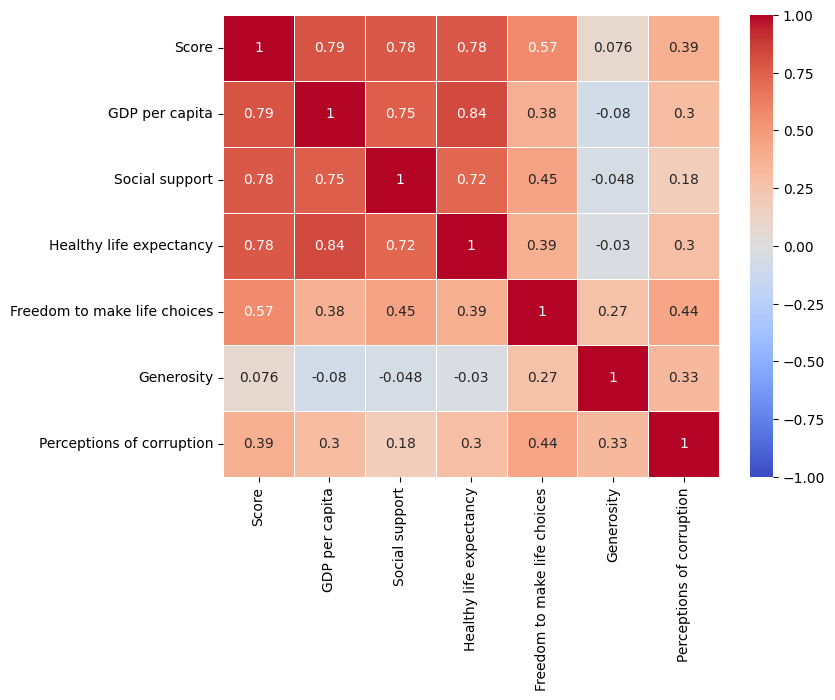

In [3]:
#First let's create a correlation heatmap
plt.rcParams.update({'figure.figsize': (8,6)}) #Set the plot size
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

From this correlation heatmap we see which variables are more **associated** with happiness score.

However it's important to note that correlation doesn't mean causation.

So, let's explore these features further to see if there's potential relationships.

We can do this using Scatter Plots

#### Scatter Plots

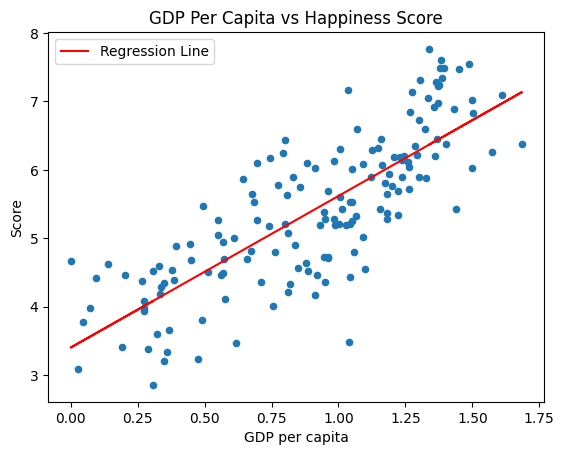

In [8]:
#Scatter plot of GDP Per Capita and Happiness Score
x = df['GDP per capita']
y = df['Score']
df.plot(kind='scatter', x = 'GDP per capita', y= 'Score', title='GDP Per Capita vs Happiness Score')
#GDP Per Capita is the X value because it's the predictor variable, it's the variable were using to 
#explain the changes in the depedendent varaible Happiness Socre

#Fit a line (simple linear regression)
slope, intercept = np.polyfit(x,y,1)

#Create regression line
regression_line  = slope * x + intercept

#Plot regression line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.legend() #Add labels
plt.show()  #Display plot

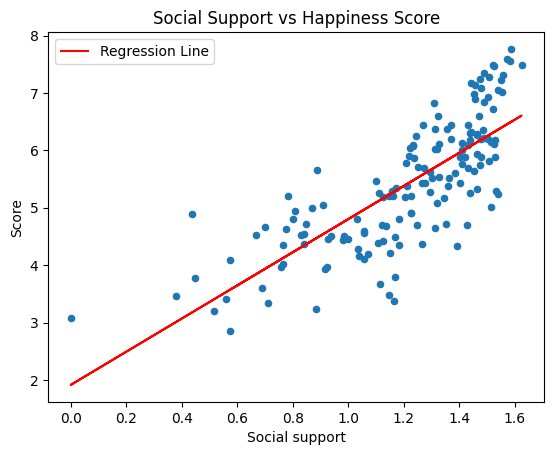

In [9]:
#Scatter between Social Support and Happiness Score
x = df['Social support']
y = df['Score']
df.plot(kind='scatter', x='Social support', y='Score', title='Social Support vs Happiness Score')

#Fit a line
slope, intercept = np.polyfit(x,y,1)
#Create linear regression line
regression_line = slope * x + intercept
#Plot line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.legend() #add labels
plt.show() #display

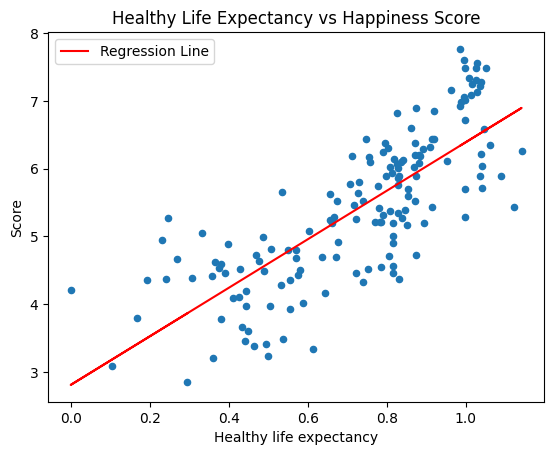

In [10]:
#Scatter between Healthy life expectancy and Score
x = df['Healthy life expectancy']
y = df['Score']
df.plot(kind='scatter', x='Healthy life expectancy', y='Score', title='Healthy Life Expectancy vs Happiness Score')

#Fit a line
slope, intercept = np.polyfit(x,y,1)
#Create regression line
regression_line = slope * x + intercept
#Plot line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.legend() #add labels
plt.show() #display

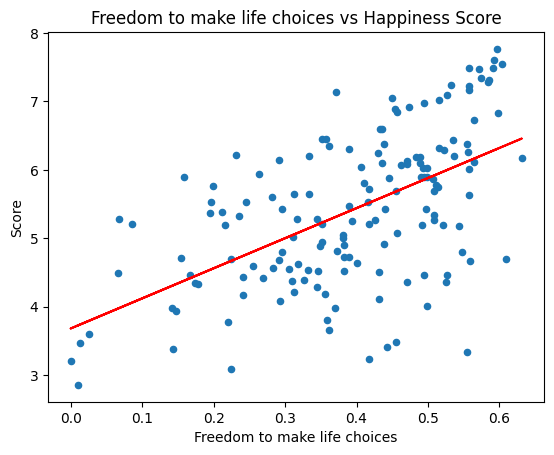

In [ ]:
#Scatter between Freedom to make life choices and Happiness Score
x = df['Freedom to make life choices']
y = df['Score']
df.plot(kind='scatter', x='Freedom to make life choices', y='Score', title='Freedom to make life choices vs Happiness Score')

#Fit a line
slope, intercept = np.polyfit(x,y,1)
#Create regression line
regression_line = slope * x + intercept
#Plot line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.legend() #add labels
plt.show() #display

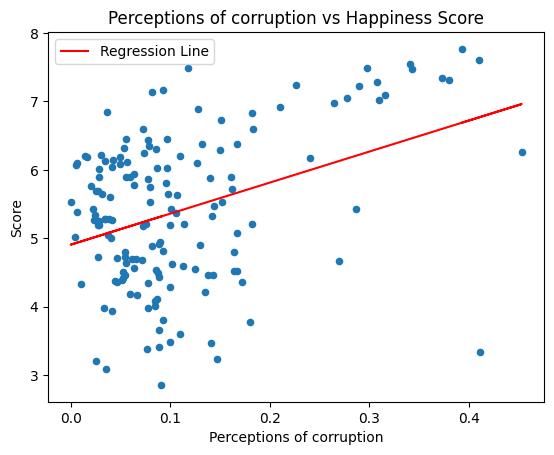

In [14]:
#Scatter between Perceptions of corruption and Happiness Score
x = df['Perceptions of corruption']
y = df['Score']
df.plot(kind='scatter', x='Perceptions of corruption', y='Score', title='Perceptions of corruption vs Happiness Score')

#Fit a line
slope, intercept  = np.polyfit(x,y,1)
#Create a regression line
regression_line = slope * x + intercept
#Plot line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.legend() #add labels
plt.show() #display

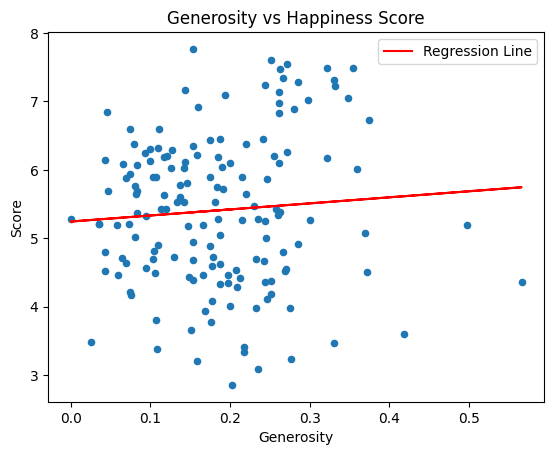

In [15]:
#Scatter between Generosity and Happiness Score
x = df['Generosity']
y = df['Score']
df.plot(kind='scatter', x='Generosity', y='Score',title='Generosity vs Happiness Score')

#Fit a line
slope, intercept = np.polyfit(x,y,1)
#Create regression line
regression_line = slope * x + intercept
#Plot line
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.legend() #add labels
plt.show() #display

Based off these visualizations we get a better insight into the relationship between our features and the happiness score 

- GDP Per Capita has the clearest linear relationship and tightly clustered points, which align with its ranking as the highest correlated feature in the correlation heatmap.
- Both Healthy Life Expectancy and Social Support display a linear relationship and tight cluster of points. However, not as much as GDP Per Capita. This supports the Correlation Heatmap as Healthy Life Expectancy and Social Support both tied as the 2nd highest correlated feature.
- While Freedom to make life choices has a linear relationship, it's less clustered than GDP, Social Support and Life Expectancy. This supports its ranking as the 4th highest correlated feature. 
- Perceptions of corruption shows an interesting relationship with the Happiness Score. At lower scores, the relationship is non linear and scattered, but around a Score of 6, a positive linear trend emerges, where higher perceived corruption corresponds to higher happiness. This is unexpected, as one might expect less corruption to correlate with greater happiness. Overall, percetions of corruption has a weaker relationship with happiness compared to the top four features. 
- Generosity doesn't show a linear relationship and is scattered. This supports the correlation heatmap where Geneorsity ranked as the least correlated feature. As a result we can infer that Generosity has little to no relationship with Happiness. 

However, there are futher steps we can take to assess which features most impact the happiness score.
Lets move into regression analysis!

## Regression Analysis

#### Linear Regression

The 'Country or Region' column is a categorical variable with 156 unique values. Encoding it using methods like One-Hot Encoding (which would create 156 binary columns) or Label Encoding (which would assign 156 unique integers to each country) would not improve the model's performance and could actually harm it. Given that each row in this column contains a unique value and it doesn't contribute to our goal, it's better to drop this column entirely.

In [4]:
#Drop the country or region column
df_2 = df.drop(columns=['Country or region'])
df_2.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,
1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Now let's begin

In [5]:
#Preparing X and y
X = df_2.drop(columns=['Score']) #X is our feature variable
y = df_2['Score'] #y is our target or response variable 

#Split our data into training and testing splits 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
#allocate higher portion to training because of our small dataset 


In [6]:
#Create variable for LinearRegression
lr = LinearRegression()
#Fit the model on our training data
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
#Lets check the coefficients and the intercept
print(lr.intercept_)
pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficients': lr.coef_
})

1.8115122981234242


,Feature,Coefficients
0,GDP per capita,0.750717
1,Social support,1.232325
2,Healthy life expectancy,0.930945
3,Freedom to make life choices,1.489813
4,Generosity,0.270378
5,Perceptions of corruption,1.112431


The intercept shows us that if all our features where set at 0 the **Score** of the country would be 1.8

With the Coefficient table we can see the impact of each feature on the Happiness Score. For instance, take Generosity, the lowest coefficent. For everyone one unit increase in Generosity, the Happiness Score would only increase by 0.27. This is signifcantly smaller than every other feature. This supports our inital analysis that Generosity might have little to no relationship with Happiness. Interestingly, Perceptions of Corruption has a relatively high coefficient compared to GDP or Life Expectancy, suggesting a stronger influence than initially expected. However, this requires further analysis to fully understand these relationships.

Before that let's take a look at the predictions of our model. 

In [7]:
#Make predicitions on testing set
y_pred = lr.predict(X_test)
y_pred

array([5.7442045 , 5.56511777, 5.60890314, 5.90852816, 4.26855754,
       6.26292955, 5.57869726, 5.15487136, 5.74865818, 4.75898669,
       6.18643741, 5.21627323, 6.97482079, 4.83461768, 6.14786243,
       6.15654394, 4.42594682, 3.67313537, 4.58340625, 5.5586478 ,
       4.116539  , 6.3909045 , 6.23491027, 6.71797974, 5.78862855,
       5.23659213, 5.60434748, 5.820436  , 6.06497255, 4.47065604,
       5.50355705, 5.30073606])

Let’s take a look at the p-values to see which features are statistically significant. Any feature with a p-value **lower than 5%** is considered statistically significant, indicating a meaningful relationship with happiness.

In [ ]:
X_train = sm.add_constant(X_train) #Add constant to X for the intercept
model = sm.OLS(y_train, X_train).fit() #Fit the model on training data 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     86.01
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           1.53e-40
Time:                        15:30:01   Log-Likelihood:                -86.548
No. Observations:                 124   AIC:                             187.1
Df Residuals:                     117   BIC:                             206.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Interpretations 
- GPD Per Capita, Social Support, Life Expectancty, Freedom to make life choices are all indcators of happiness in a country as they all have a p-value lower than 5%
- Perceptions of corruption is still significant but not as much as the others because it's P-value is closer to 5%
- Generosity probably isn't a indicator of a countries happiness because it has a P-value higher than 5%
- This generally supports both the correlation heatmap and scatter plots. 
- **We can conclude that Generosity has little to do with a countries happiness**

Next let's dive further into analyzing our model's performance

Text(0.5, 1.0, 'Predicted vs Actual Values')

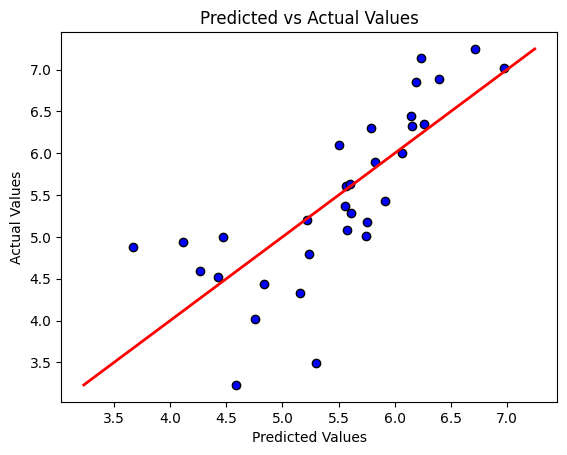

In [9]:
#Lets check out the graph between our predicted values and our actual values
plt.scatter(y_pred, y_test, color='blue', edgecolors='black')
#add 45-degree line reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Values')

This scatter plot shows that our predicted values and actual values have a linear relationship. This indicates that our model is performing well. However there are some outliers in the lower values meaning our model struggles to predict countries with low scores. Additonally, these outliers might be due to the fact **that other factors influence happiness** other than the ones in our dataset. Futhermore, something like happiness is **subjective** so it's hard to accuractely capture it. There are more nuances involved to a metric like happiness. To further evaluate our model lets make a graph of our residauls vs fitted values.

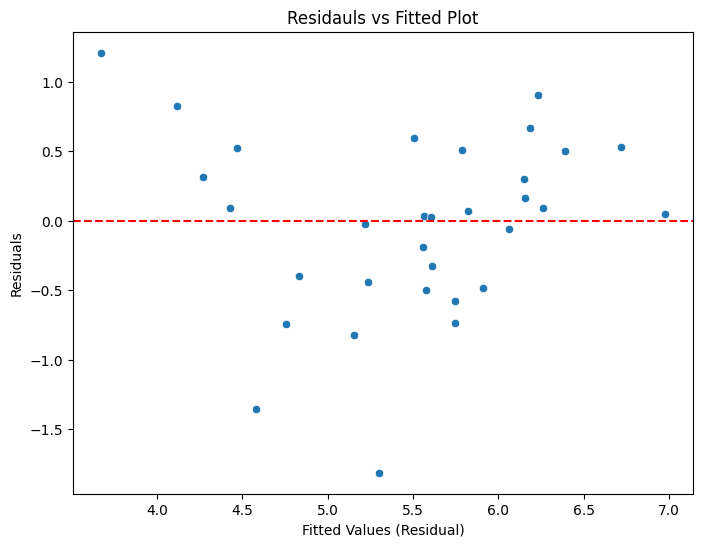

In [30]:
#Let's plot the difference between our predicted vs actual values
#For this we can use a residual vs fitted plot

#Calculate residuals
residuals = y_test - y_pred

#Create the residual vs fitted plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)

#Add a horizontal line at y = 0 
plt.axhline(0, color='red', linestyle='--')

#Add labels and display
plt.xlabel('Fitted Values (Residual)')
plt.ylabel('Residuals')
plt.title('Residauls vs Fitted Plot')
plt.show()

In our residuals vs. fitted plot, we’re looking for patterns, particularly a random scatter of points evenly distributed above and below the zero line. Our plot shows this pattern, indicating that a linear model is a good fit for the data. If there were a pattern to the points, it would suggest that we needed to adjust our linear model or choose a different model.

Let's further evaluate our model by checking the RMSE.

In [8]:
#Initalize RMSE 
rmse  = root_mean_squared_error(y_test, y_pred)

#Print results
print('Root Mean Squared Error: ', round(rmse,2))


Root Mean Squared Error:  0.64


RMSE shows us that the model is typically off by 0.64. For example, if the model predicts a score of 7.0, the actual score would likely range from 6.36 to 7.64.

Let's see if we can improve the performance of our model by using two different feature selection methods to pick the top 3 features. 

In [55]:
#Using filter method
selector = SelectKBest(score_func=f_regression, k=3) #select top 3 features
X1, y1 = X, y
X_selected = selector.fit_transform(X1, y1)

#Display top 3 features
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['GDP per capita', 'Social support', 'Healthy life expectancy'], dtype='object')


In [9]:
#Linear Regression using top 3 features from filter method as features 
X1 = df[['GDP per capita', 'Social support', 'Healthy life expectancy']]
y1 = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X1,y1, train_size=0.8, random_state=42)
lr_2 = LinearRegression().fit(X_train,y_train)

y_pred = lr_2.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: ", round(rmse,))

Root Mean Squared Error:  1


In [52]:
#Feature selection
#Wrapper Method

#Initalize linear regression model
model = LinearRegression()

#Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=3)  # Select top 3 features

#Fit RFE on training data
rfe.fit(X_train, y_train)

#Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features using RFE:", selected_features.tolist())

Selected Features using RFE: ['Social support', 'Healthy life expectancy', 'Freedom to make life choices']


In [11]:
#Linear Regression using top 3 features from filter method as features 
X1 = df[['Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
y1 = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X1,y1, train_size=0.8, random_state=42)
lr_2 = LinearRegression().fit(X_train,y_train)

y_pred = lr_2.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: ", round(rmse,))

Root Mean Squared Error:  1


From the Filter method I got my top 3 features as GDP Per Capita, Social support, and Life expectancy. From the Wrapper wrapper I got Social support, Life expectancy, and freedom to make life choices. However, it's important to note that the Filter Method ranks features based off their individual performance, using criteria such as correlation. The Wrapper Method ranks features based off how they interact with each other to improve the models performance. Although these methods produce different rankings I can still confidently say that Life expectancy and Social Support are significant to a happiness.

Additionally, when using the top 3 features from both methods we saw that our model's performance didn't improve. 
This means that our model might perform better with more features. This makes sense as happiness can be influenced by multiple factors, not just the ones in our dataset. 

#### Logistic Regression

Next, let's feature engineer a new column called 'is_happy.' According to the World Happiness Report, countries with a score greater than 6 are considered happy. With this new binary column, we can run a logistic regression model, as well as a decision tree and random forest.

In [4]:
#Define function
def is_happy_function(x):
    if x > 6:
        return 1 #By returning 1 this means the country is happy, is_happy = true
    else:
        return 0 #By returning 0 this means the country isn't happy, is_happy = false

In [5]:
#Apply function to create a new column: is_happy
df_2['is_happy'] = df_2['Score'].apply(is_happy_function)
df_2.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,is_happy
Overall rank,,,,,,,,
1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [6]:
#Drop Score column from dataset because it is no longer necessary since we have is_happy
#Additionally if we kept score, it would perfectly predict is_happy which is our new target variable
df_3 = df_2.drop(columns=['Score'])
df_3.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,is_happy
Overall rank,,,,,,,
1,1.340,1.587,0.986,0.596,0.153,0.393,1
2,1.383,1.573,0.996,0.592,0.252,0.410,1
3,1.488,1.582,1.028,0.603,0.271,0.341,1
4,1.380,1.624,1.026,0.591,0.354,0.118,1
5,1.396,1.522,0.999,0.557,0.322,0.298,1


In [10]:
df_3['is_happy'].value_counts()

is_happy
0    104
1     52
Name: count, dtype: int64

Out of 156 countries only 52 of them are truly considerd happy

In [8]:
#Create logisitic regression model
X = df_3.drop(columns='is_happy') #predictor variables 
y = df_3['is_happy'] #target variable

#Split data into training and testing splits
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, train_size=0.8, random_state=27)

#Initalize model and fit model with data
logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)

LogisticRegression()

In [ ]:
#Check coeficients to check if there's any difference between the logistic regression
#and linear regression 
print(logreg.intercept_)
pd.DataFrame({
    'Features': X_train2.columns,
    'Coefficients': logreg.coef_[0]
})

[-7.26879788]


,Features,Coefficients
0,GDP per capita,2.458577
1,Social support,1.772744
2,Healthy life expectancy,1.514397
3,Freedom to make life choices,1.363360
4,Generosity,0.334342
5,Perceptions of corruption,0.482422


Our logistic regression model has different coefficients compared to the linear regression model because the two models assign importance to features in different ways. Regardless, the coefficients from the logistic regression still support our earlier findings, Generosity and Perceptions of Corruption have a weaker influence on happiness 

In [11]:
#Check predictions
y_pred_log = logreg.predict(X_test2)
y_pred_log

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [14]:
#Model evaluation
#Initalize confusion matrix 
cm = confusion_matrix(y_test2, y_pred_log)
cm

array([[22,  2],
       [ 2,  6]])

In [15]:
#Check accuracy score
accuracy = accuracy_score(y_test2, y_pred_log)
print('Accuracy: ' + str(round(accuracy * 100, 3)) + '%')

Accuracy: 87.5%


In [16]:
#Check f1_score 
f1 = f1_score(y_test2, y_pred_log)
print("F1 Score: ", f1)

F1 Score:  0.75


In [17]:
#Check precision 
precision = precision_score(y_test2,y_pred_log)
print("Precision Score: ", precision)

Precision Score:  0.75


In [39]:
#Check recall
recall = recall_score(y_test2, y_pred_log)
print("Recall", round(recall, 3))

Recall 0.75


We can conclude that our model is performing relatively well. 
-  **Accuracy**: 87.5% of the time the model was able to accurately predict whether a country was happy or unhappy. 
- **Precision**: Out of all the countries predicted to be happy, 75% of them are actually happy. 
- **Recall**: Out of all the countries that are actually happy our model identfied 75% of them as happy. 
- **F1 Score**: Our f1 score of 0.75 shows our model has a good balance between precision and recall. This means the model peforms well at predicting and identifying happy countries. 

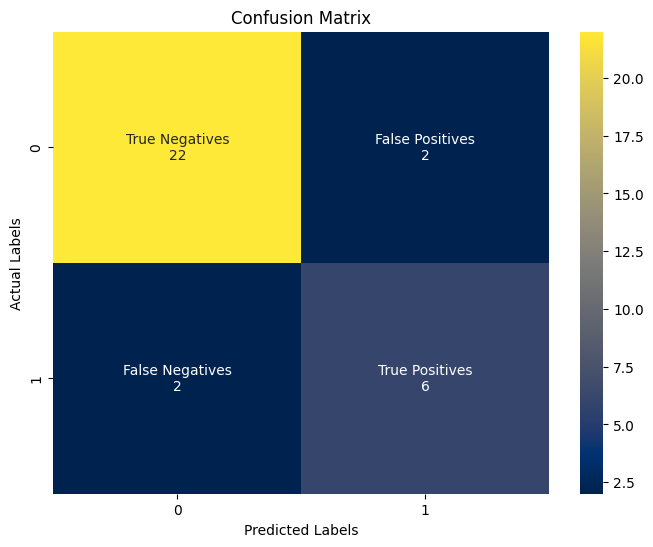

In [18]:
#Let's display the confusion matrix 
tn, fp, fn, tp =  cm.ravel() #Extract true postive/negative and false postive/negative

#Create a custom labels display
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Plot the confusion matrix 
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=labels, fmt='', cmap='cividis')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
class_names = [0,1] #Class labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation = 90)
plt.show()

## Decision Tree

In [9]:
#Initialize decision tree
#Decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train2,y_train2) #fit tree on training data

DecisionTreeClassifier(random_state=42)

In [ ]:
#Check the order of classes in the model
print("Class order in the model:", decision_tree_model.classes_)
#This allows us to properly name our classes
#Unhappy, Happy

Class order in the model: [0 1]


Decision Tree Model Accuracy:  0.84375

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.71      0.62      0.67         8

    accuracy                           0.84        32
   macro avg       0.80      0.77      0.78        32
weighted avg       0.84      0.84      0.84        32



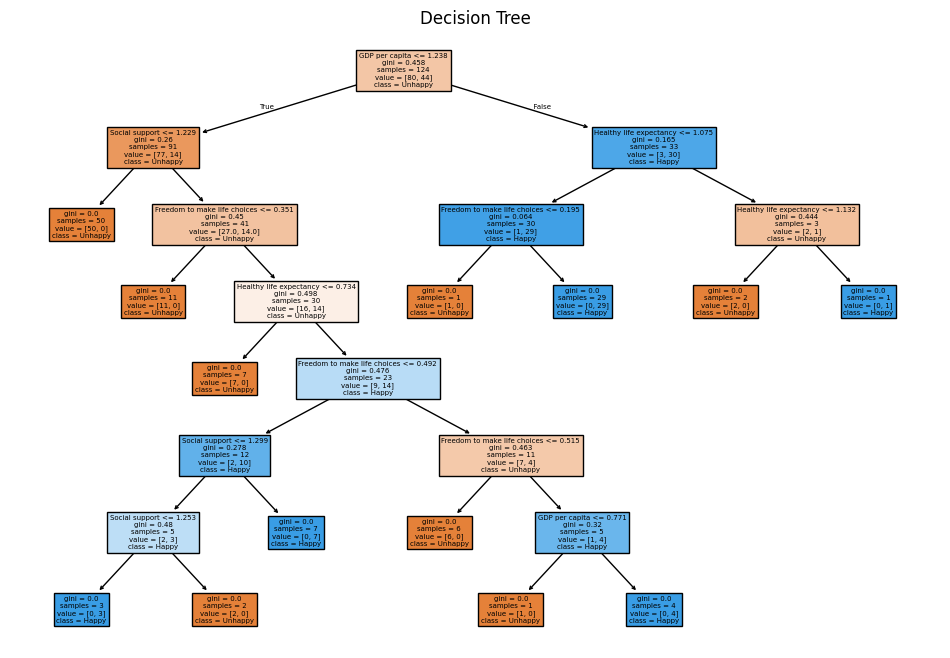

In [ ]:
#Make predictions
y_pred_tree = decision_tree_model.predict(X_test2)

#Evaluate Model
print("Decision Tree Model Accuracy: ", accuracy_score(y_test2,y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test2,y_pred_tree))

#Display Decision tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Unhappy', 'Happy'])
plt.title("Decision Tree")
plt.show()

Decision Tree Model Accuracy:  0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.67      0.50      0.57         8

    accuracy                           0.81        32
   macro avg       0.76      0.71      0.73        32
weighted avg       0.80      0.81      0.80        32



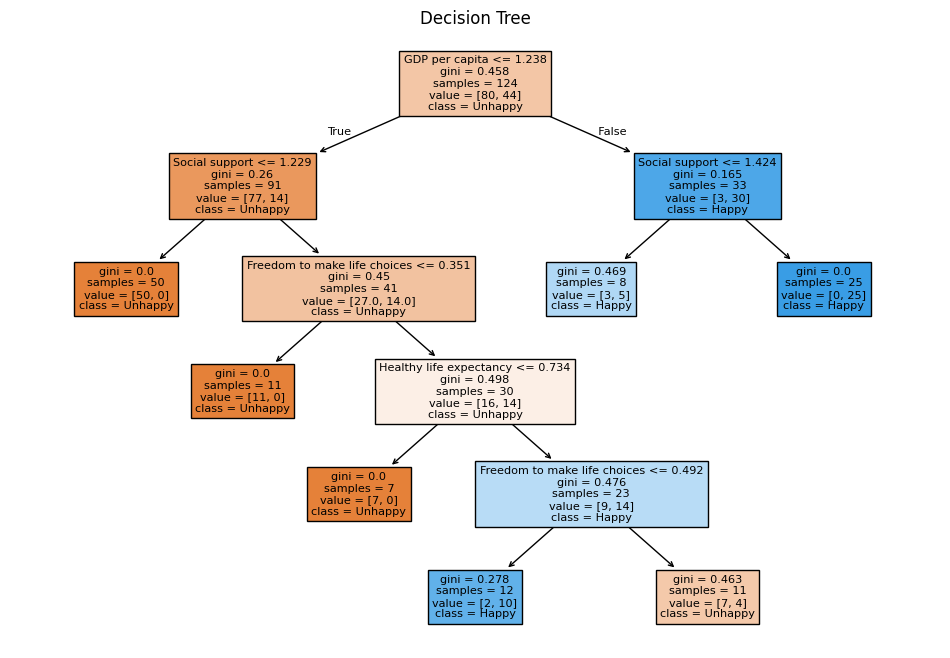

In [18]:
#Decision tree with parameters
decision_tree_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=10)
decision_tree_model.fit(X_train2,y_train2) #fit tree on training data

#Make predictions
y_pred_tree = decision_tree_model.predict(X_test2)

#Evaluate Model
print("Decision Tree Model Accuracy: ", accuracy_score(y_test2,y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test2,y_pred_tree))

#Display Decision tree
plt.figure(figsize=(12,8))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Unhappy', 'Happy'])
plt.title("Decision Tree")
plt.show()

In [20]:
#Rank feature importance for decision tree
#Access feature importances
importances = decision_tree_model.feature_importances_

#Order the feature importances
sorted_indices = importances.argsort()[::-1]  #Order by descending order
sorted_importances = importances[sorted_indices]

#Print the ranked features and their importance scores
for i in sorted_indices:
    print(f"Feature: {X_train.columns[i]}, Importance: {importances[i]}")

Feature: GDP per capita, Importance: 0.5147997457088366
Feature: Freedom to make life choices, Importance: 0.2018912481120858
Feature: Social support, Importance: 0.15124154300983572
Feature: Healthy life expectancy, Importance: 0.1320674631692418
Feature: Generosity, Importance: 0.0
Feature: Perceptions of corruption, Importance: 0.0


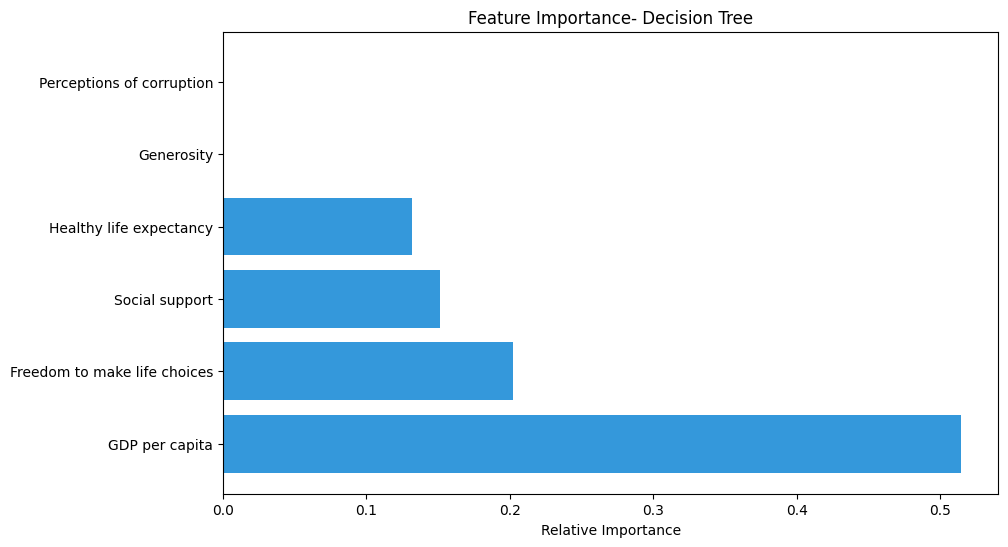

In [11]:
#Plot random forest importances
plt.figure(figsize=(10,6))
plt.title("Feature Importance- Decision Tree")
plt.barh(range(len(sorted_indices)), sorted_importances, color='#3498db', align='center')
plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices])
plt.xlabel("Relative Importance")
plt.show()

While we can't see which specific metrics (GDP <= 500,000) leads to a country being classified as happy or unhappy we can see which features the models determine as important for a country being classified as happy or unhappy.

## Random Forest

Random Forest Model Accuracy:  0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.83      0.62      0.71         8

    accuracy                           0.88        32
   macro avg       0.86      0.79      0.82        32
weighted avg       0.87      0.88      0.87        32



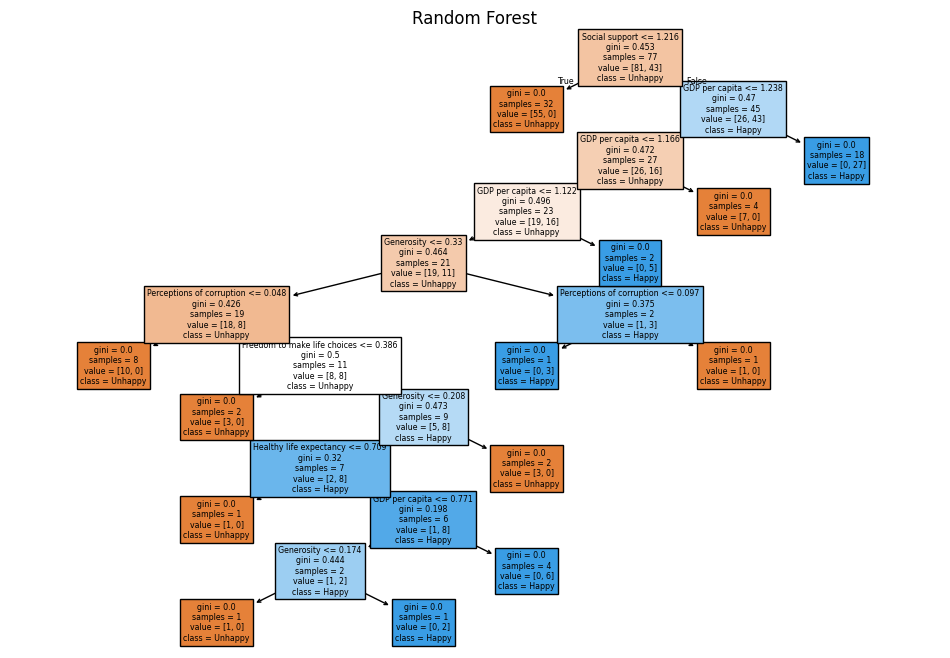

In [21]:
#Random forest w/o parameters
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train2, y_train2) #fit random forest on training data

#Make predictions
y_pred_forest = random_forest_model.predict(X_test2)

#Evaluate the model
print("Random Forest Model Accuracy: ", accuracy_score(y_test2, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_forest))

#Display the Random Forest Model
plt.figure(figsize=(12,8))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X.columns, class_names=["Unhappy", "Happy"])
plt.title("Random Forest")
plt.show()

Random Forest Model Accuracy:  0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.83      0.62      0.71         8

    accuracy                           0.88        32
   macro avg       0.86      0.79      0.82        32
weighted avg       0.87      0.88      0.87        32



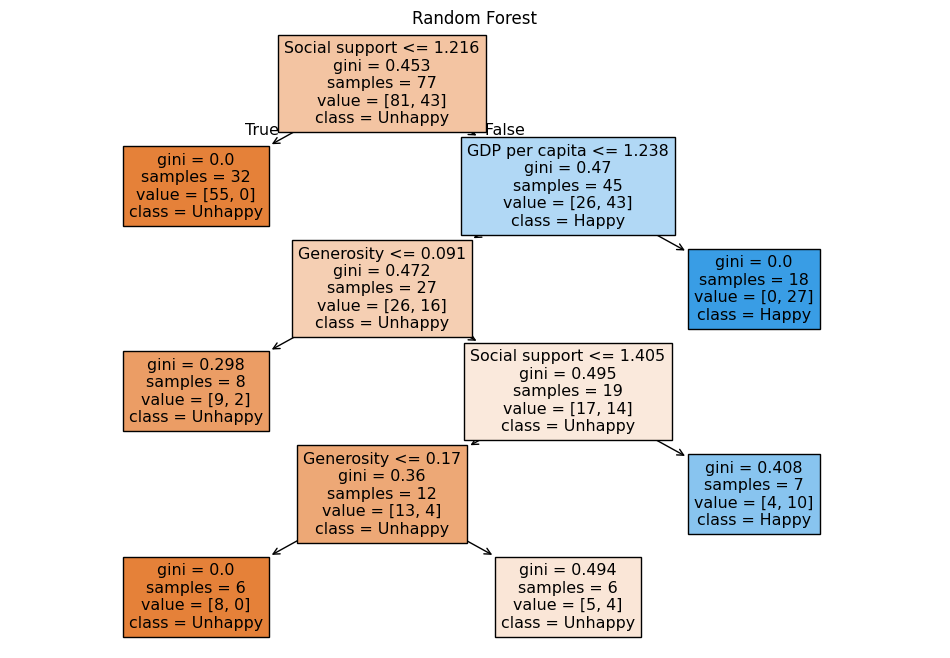

In [22]:
#Random forest with parameters
random_forest_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=10,
    bootstrap=True)
random_forest_model.fit(X_train2, y_train2) #fit random forest on training data

#Make predictions
y_pred_forest = random_forest_model.predict(X_test2)

#Evaluate the model
print("Random Forest Model Accuracy: ", accuracy_score(y_test2, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_forest))

#Display the Random Forest Model
plt.figure(figsize=(12,8))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X.columns, class_names=["Unhappy", "Happy"])
plt.title("Random Forest")
plt.show()

Random Forest Model Accuracy:  0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       0.83      0.62      0.71         8

    accuracy                           0.88        32
   macro avg       0.86      0.79      0.82        32
weighted avg       0.87      0.88      0.87        32



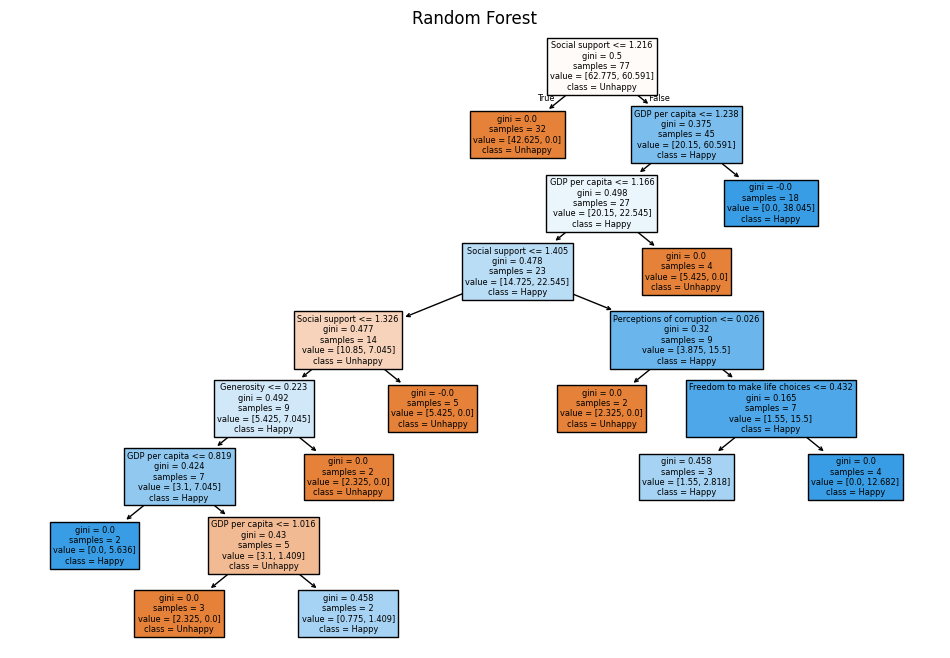

In [23]:
#Random forest with more parameters
random_forest_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100, 
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    max_leaf_nodes=20,
    bootstrap=True,
    class_weight='balanced')
random_forest_model.fit(X_train2, y_train2) #fit random forest on training data

#Make predictions
y_pred_forest = random_forest_model.predict(X_test2)

#Evaluate the model
print("Random Forest Model Accuracy: ", accuracy_score(y_test2, y_pred_forest))
print("\nClassification Report:\n", classification_report(y_test2, y_pred_forest))

#Display the Random Forest Model
plt.figure(figsize=(12,8))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X.columns, class_names=["Unhappy", "Happy"])
plt.title("Random Forest")
plt.show()

The accuracy of our random forest model was 87.5% meaning it correctly predicted whether a country was happy or unhappy 87.5% of the time. For "Unhappy" countries the model is highly accurate, with 88% precision, 96% recall, and a strong F1-score of 0.92. For "Happy" countries the Precision is 83%, but recall is lower at 62%, meaning it struggles to identify all happy countries. The F1-score is 0.71.Overall, the random forest performs well, but it's better at predicting Unhappy countries than Happy countries. However, the model's stronger performance in predicting 'Unhappy' countries may partly result from the greater number of data points available for this class, as shown by the support values.

In [ ]:
#Rank feature importance
#Access feature importances
importances = random_forest_model.feature_importances_

#Order the feature importances
sorted_indices = importances.argsort()[::-1]  #Order by descending order
sorted_importances = importances[sorted_indices]
#Print the ranked features and their importance scores
for i in sorted_indices:
    print(f"Feature: {X.columns[i]}, Importance: {importances[i]}")

Feature: GDP per capita, Importance: 0.26142304395556326
Feature: Healthy life expectancy, Importance: 0.24862104471233365
Feature: Social support, Importance: 0.2070936407832303
Feature: Freedom to make life choices, Importance: 0.1796209216890366
Feature: Perceptions of corruption, Importance: 0.06093584945824661
Feature: Generosity, Importance: 0.04230549940158972


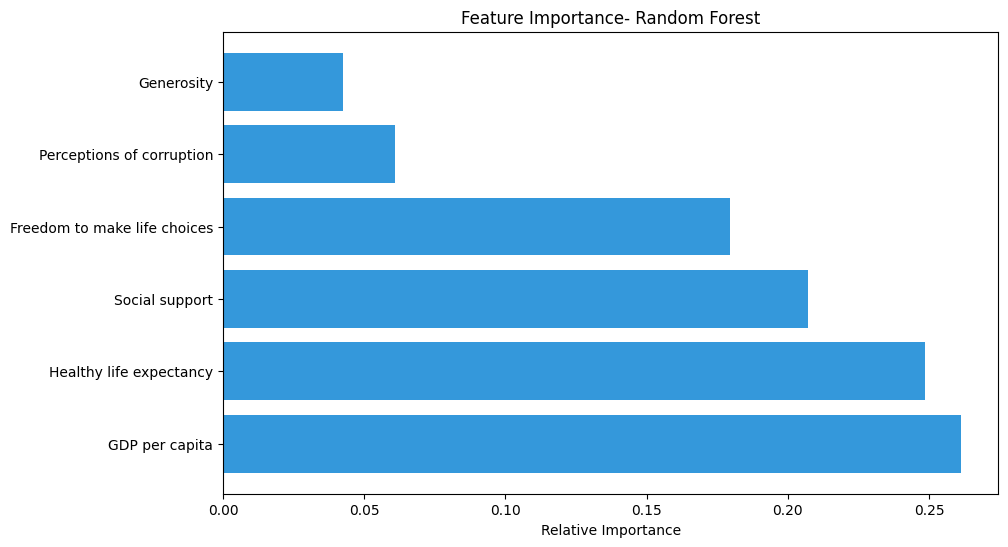

In [40]:
#Plot random forest importances
plt.figure(figsize=(10,6))
plt.title("Feature Importance- Random Forest")
plt.barh(range(len(sorted_indices)), sorted_importances, color='#3498db', align='center')
plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices])
plt.xlabel("Relative Importance")
plt.show()

With the Random Forest and Decision Tree we can see which features the models determined as most important when making its predictions. Overall this supports our whole analysis with GDP, social support, and life expectancy being at the top of the ranking. Additionally, generosity and perceptions of corruption are at the bottom of the rankings far lower than the other features. 


## Findings
- From the visualizations of both models and the importance rankings we can see which features are most influetial in predicting happiness. 
- While the Random Forest had different feature importances than the Decision Tree, we can consider the Random Forest to be more accurate because it uses multiple Decision Trees to get to it's prediction and its less prone to overfitting. 
- We can combine all our findings from the correlation heatmap, scatter plots, linear and logistic regression, OLS summary p-values, feature selection, Random Forest and Decision tree to determine which features most impact a countries happiness
- We can split our features into 3 groups
- The **Primary Features** are the ones which have high statistical significance as supported by the p-values and have high predictive power (random forest importance ranking). This includes GDP Per Capita, Social Support and Healthy Life Expectancy 
- The **secondary features** are the features which are still important as supported by the p-values, but don't have as much predictive power as the others. This includes freedom to make life choices and percpetions of corruption 
- **Little to no impact** Generosity consistently performed poorly across all methods. We can therefore say Generosity has little to no impact on a countries happiness. 

## Final Rankings
1. **Primary Features**
- GDP Per Capita
- Social Support 
- Healthy Life Expectancy 
2. **Secondary Features**
- Freedom to make life choices
- Perceptions of Corruption
3. **Little to no impact**
- Generosity


## Limitations
While this project has provided interesting insights, it's important to acknowledge limitations.

For one, **happiness is subjective**. What makes one person happy doesn't always make another person happy.

Secondly, **other factors influence happiness**. Obviously there's more to happiness than just the features we've explored. 

Third, **bias in the data**. This dataset was provided by kaggle from the World Happiness Report 2019 rankings of 156 countries. The World Happiness Report ranked these countries using data from the Gallup World Poll, in which citizens from different countries were asked questions which were used to come out with the data for this dataset. Because the data was collected in a survey, there's a chance for bias from the survey respondents. 

Lastly, **cultural differences in happiness**. Different cultures define and experience happiness in different ways. Thus, the findings from this project may not be universally applicable.  

## Advice
Despite the limitations it's still reasonable to say that, to improve happiness, governments should prioritize policies that enhance economic stability, support social well-being, and improve public health. While other factors also play a role, focusing on these key areas is likely to have the most significant positive impact on citizens' well-being and overall happiness.
